# Digit Recognizer
Kaggle: https://www.kaggle.com/competitions/digit-recognizer/data

Algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

Ref: https://mks.tw/2880/數據分析-踏上-kaggle-之路-使用-knn-預測-digit-recognizer

# Data Observation and Preparation
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

(42000, 785)
(42000,)
(42000, 784)
(28, 28)
The first number is 1


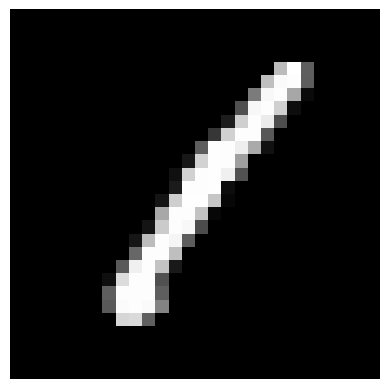

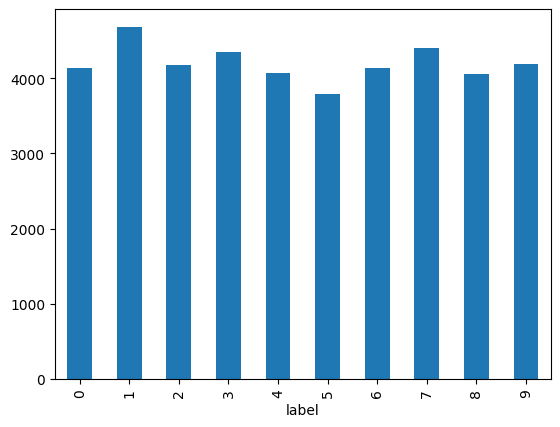

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
TrainData = pd.read_csv('input/train.csv')
print(TrainData.shape)

# Split data into x and y
Train_y = TrainData.iloc[:,0] # iloc is a method to select rows and columns from a DataFrame by their integer index positions.
print(Train_y.shape)
Train_x = TrainData.iloc[:,1:] 
print(Train_x.shape)

# try to plt the first number 
first_num = Train_x.iloc[0,:]
first_num = first_num.values.reshape(28, 28)
print(first_num.shape)
print(f'The first number is {Train_y.iloc[0]}')
plt.imshow(first_num, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# observe the data detribution
val_count = Train_y.value_counts().sort_index()  # Sort by index (digit label)
val_count.plot(kind='bar')
plt.show()

# Feature Engineering
Thresholding, create binary images from grayscale images

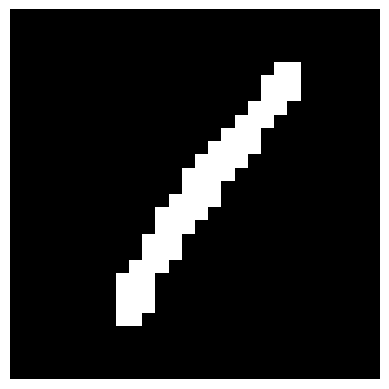

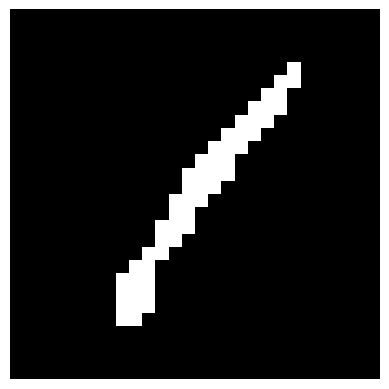

C:\Users\alanc\AppData\Local\Temp\ipykernel_12152\3541544073.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_x.loc[index] = binary_row


The output is showing 0


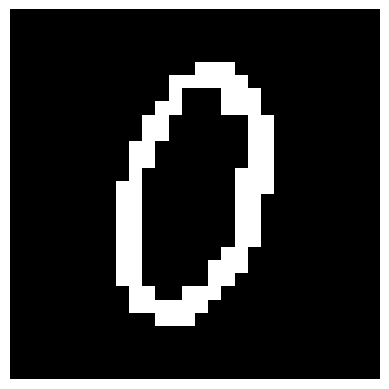

In [33]:
import numpy as np

# find the better threshold by using the first data as comparison
test1 = Train_x.iloc[0,:].copy()
test2 = Train_x.iloc[0,:].copy()

threshold = 150 
test1 = np.where(test1 > threshold, 255, 0)
test1 = test1.reshape(28, 28)
plt.imshow(test1, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

threshold = 200 
test2 = np.where(test2 > threshold, 255, 0)
test2 = test2.reshape(28, 28)
plt.imshow(test2, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

# 150 seems to be better, let's use 150 as our threshold
threshold = 150 
for index, row in Train_x.iterrows(): # index: The index label of the row. row: A pandas Series object representing the data in that row.
    # Apply thresholding to each pixel in the row
    binary_row = np.where(row > threshold, 255, 0)
    # Update the row in Train_x with the binary values
    Train_x.loc[index] = binary_row

# try to plt the random number 
test_num = Train_x.iloc[5,:]
test_num = test_num.values.reshape(28, 28)
print(f'The output is showing {Train_y[5]}')
plt.imshow(test_num, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

# Final data adjustment
1. split data into train and validation set
2. image value is between 0 and 255, scale it to between 0 and 1.
3. One-Hot Encoding. One-hot encoding is a standard way to represent categorical data in a numerical format that a neural network can process, make it compatible with Output Layer
4. Reshape the data


In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# split data into training and validation set into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(Train_x, Train_y, test_size = 0.2, random_state = 0) # set random state as an integer to allow reproducibility

# scale data to between 0 and 1
x_train =  x_train/255
x_val =  x_val/255

# One hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Reshape the data to (n_samples, img_rows, img_cols, 1), the 1 at the end of the reshape operation represents the number of color channels in the image
print("x_train shape:", x_train.shape)  
print("x_val shape:", x_val.shape) 
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.values.reshape(x_val.shape[0], 28, 28, 1)
print("x_train shape:", x_train.shape)  # Should output (33600, 28, 28, 1)
print("x_val shape:", x_val.shape) 

x_train shape: (33600, 784)
x_val shape: (8400, 784)
x_train shape: (33600, 28, 28, 1)
x_val shape: (8400, 28, 28, 1)


# Train a CNN model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0     

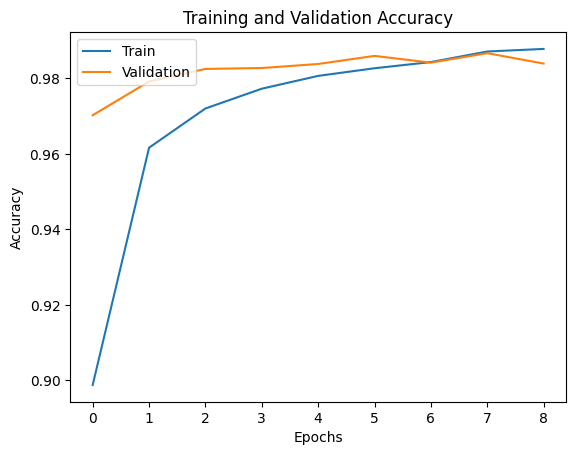


------------------------------
Epoch 1: Val_loss=0.09643911570310593, Val_accuracy=0.9702380895614624
Epoch 2: Val_loss=0.06779159605503082, Val_accuracy=0.9791666865348816
Epoch 3: Val_loss=0.05685746297240257, Val_accuracy=0.9825000166893005
Epoch 4: Val_loss=0.0616314634680748, Val_accuracy=0.9827380776405334
Epoch 5: Val_loss=0.05768130347132683, Val_accuracy=0.9838095307350159
Epoch 6: Val_loss=0.04943307116627693, Val_accuracy=0.9859523773193359
Epoch 7: Val_loss=0.05559740960597992, Val_accuracy=0.98416668176651
Epoch 8: Val_loss=0.054924532771110535, Val_accuracy=0.9866666793823242
Epoch 9: Val_loss=0.059736467897892, Val_accuracy=0.9839285612106323


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# Set seed for TensorFlow (graph-level)
tf.random.set_seed(42)

# Set seed for Python's random number generator (global level)
np.random.seed(42)

# ------------------------------------------- model code start -------------------------------------------
# Define input shape
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and dense layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.37)(x)
outputs = Dense(10, activation='softmax')(x)  # 10 classes for MNIST

# Create model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping]) 
# ------------------------------------------- model code end -------------------------------------------

def show_train_history(train_history):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

show_train_history(history)
print("\n------------------------------")
# Print validation loss and accuracy for each epoch
for epoch in range(len(history.history['val_loss'])):
    print(f"Epoch {epoch + 1}: Val_loss={history.history['val_loss'][epoch]}, Val_accuracy={history.history['val_accuracy'][epoch]}")

## without regularizer
Epoch 6: Val_loss=0.04875703901052475, Val_accuracy=0.9857142567634583

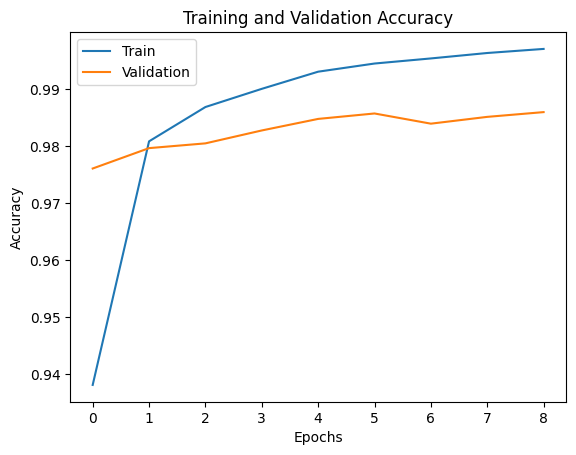

## kernel_regularizer=l2(0.001)
Epoch 4: Val_loss=0.0459640733897686, Val_accuracy=0.9871428608894348

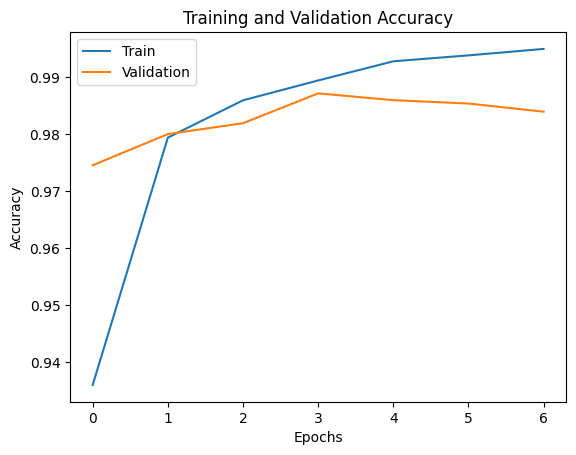

=> Val_accuracy & Val_loss slightly improved

## kernel_regularizer=l2(0.01)
Epoch 27: Val_loss=0.20270699262619019, Val_accuracy=0.9729762077331543

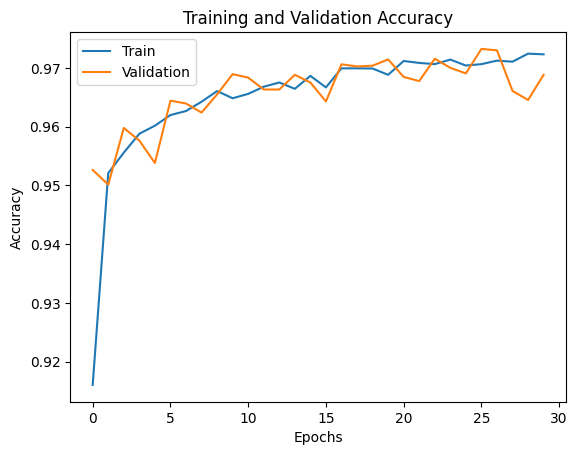

=> Regularization strength is to over

## kernel_regularizer=l2(0.0015)
Epoch 19: Val_loss=0.11165455728769302, Val_accuracy=0.98416668176651

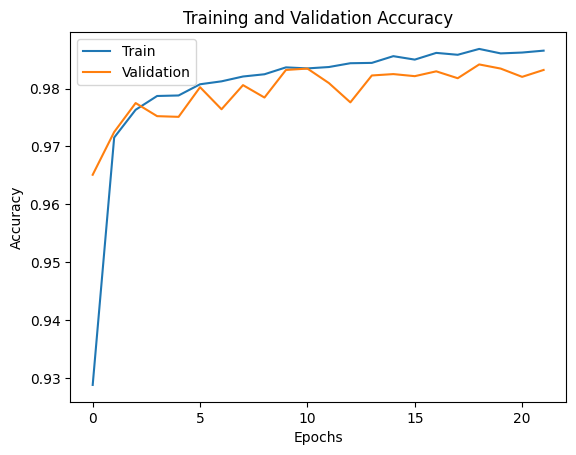

## Dropout(0.5)(x) before output layer
Epoch 6: Val_loss=0.04755874350667, Val_accuracy=0.9864285588264465

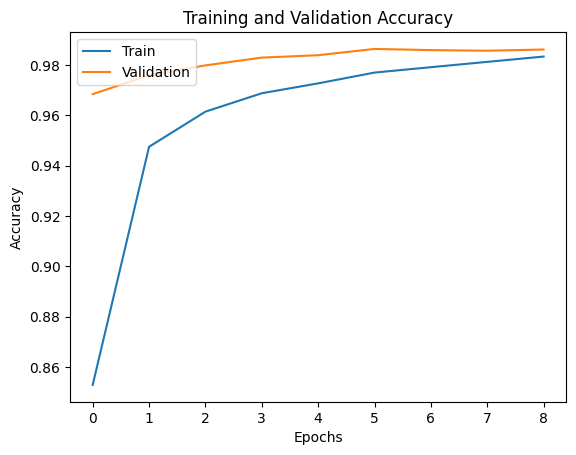

=> Underfitting! Lower the dropout rate

## Dropout(0.25)(x) before output layer
Epoch 8: Val_loss=0.04788902774453163, Val_accuracy=0.9876190423965454

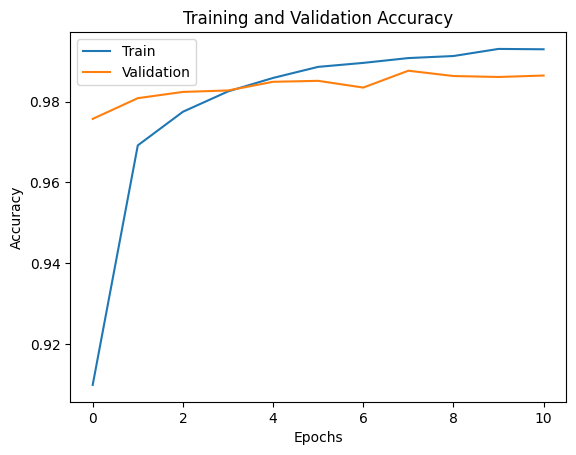

=> Overfitting! Higher the dropout rate

## Dropout(0.37)(x) before output layer
Epoch 6: Val_loss=0.04943307116627693, Val_accuracy=0.9859523773193359

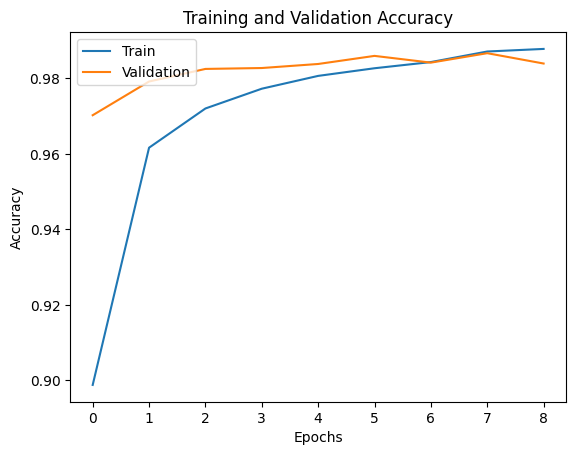

# Train a ResNet(CNN) model

# Reference and Save the output

(28000, 784)


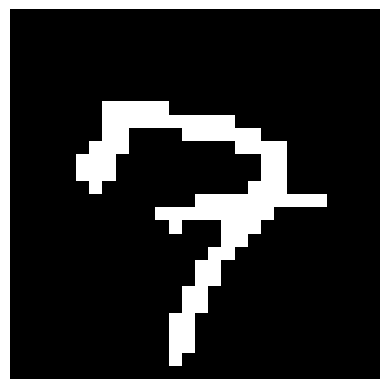

(28000, 28, 28, 1)
875/875 [==============================] - 2s 2ms/step


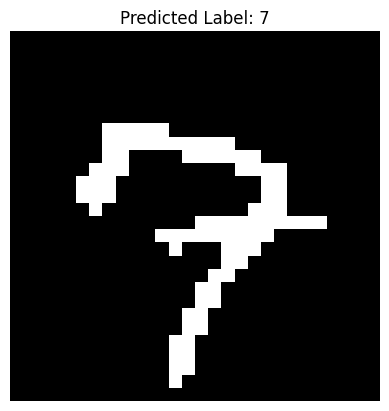

In [36]:
TestData = pd.read_csv('input/test.csv')
print(TestData.shape)



threshold = 150 
for index, row in TestData.iterrows(): # index: The index label of the row. row: A pandas Series object representing the data in that row.
    # Apply thresholding to each pixel in the row
    binary_row = np.where(row > threshold, 255, 0)
    # Update the row in Train_x with the binary values
    TestData.loc[index] = binary_row
# try to plt the random number 
test_num = TestData.iloc[5,:]
test_num = test_num.values.reshape(28, 28)
plt.imshow(test_num, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()



TestData = TestData/255
TestData = TestData.values.reshape(TestData.shape[0], 28, 28, 1)
print(TestData.shape)

# Make predictions
predictions = model.predict(TestData)

# Example: Visualize a random test number and its predicted label
test_index = 5
test_num = TestData[test_index].reshape(28, 28)
plt.imshow(test_num, cmap='gray', vmin=0, vmax=1)  
plt.axis('off')
plt.title(f'Predicted Label: {np.argmax(predictions[test_index])}')
plt.show()



# Save to csv
ImageId = range(1, 28001) 
# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1) 
# Create a DataFrame with PassengerId and predictions
results_df = pd.DataFrame({
    'ImageId': ImageId,
    'Label': predicted_labels  # Replace with your predicted values
})


# ------------------------------------- change here -------------------------------------
results_df.to_csv('output/Dropout0.5.csv', index=False)

# ------------------------------------- change here -------------------------------------
